Microsoft Original Content Insight Project
image-4.png

Overview
Microsoft has decided to start a new movie studio, but they don’t know anything about making movies or the current movie market. I’ve been tasked with reviewing the data of recent movie for trends and provide insights and recommendations. I was able to combine basic movie data (titles, runtime, and genre) from IMDB and budget and gross data from The Numbers. When comparing genre information from the top 100 worldwide grossing films to production budgets and gross, trends began to develop. Action and Adventure films are the most popular and highest grossing among the top films. They are also the films with the highest production budgets. I would recommend Microsoft create an Action, Adventure, Sci-Fi film and expect to spend 245 million.

Business Understanding
As a stakeholder it’s important to understand the market and that include potential budgets and return on investments. With nearly 700 movies released every year, over the last decade, it can be hard to know where to start. My goal is to answer three questions about current market:

What trends are there with the different genres?
What type of budget can you expect?
What kind of movie lengths are present in the top movies?
Data Understanding
IMDB provides us with an extensive database of movie information. Here you can find everything from actors and director to release dates and runtime. For this analysis we will focus on movie title, release year, and genres. We will also use information from The Number. Here we once again from the movie title and release date, but we also find the production budget and gross infromation.

Let's start by importing all of the libraries and modules I will need for this project.

In [115]:
from zipfile import ZipFile 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from math import sin, cos, sqrt, atan2, radians
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.formula.api import ols

#Allows the plots to be displayed and be stored with the notebook.
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

Reading the Data
In order to analyze the date, I first need to read the data and understand what information it gives me.

IMDB
Before I can read what is in the database, I need to unzip the IMDB database and connect to it.



In [2]:
kc = pd.read_csv('data/kc_house_data.csv')
kc.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


| Column Names | Descriptions |
| --- | --- |
| `id` | Unique identifier for a house |
| `date` | Date house was sold |
| `price` | Sale price (prediction target) |
| `bedrooms` | Number of bedrooms |
| `bathrooms` | Number of bathrooms |
| `sqft_living` | Square footage of living space in the home |
| `sqft_lot` | Square footage of the lot |
| `floors` | Number of floors (levels) in house |
| `waterfront` | Whether the house is on a waterfront |
| `view` | Quality of view from house |
| `condition` | How good the overall condition of the house is. Related to maintenance of house. |
| `grade` | Overall grade of the house. Related to the construction and design of the house. |
| `sqft_above` | Square footage of house apart from basement |
| `sqft_basement` | Square footage of the basement |
| `yr_built` | Year when house was built |
| `yr_renovated` | Year when house was renovated |
| `zipcode` | ZIP Code used by the United States Postal Service |
| `lat` | Latitude coordinate |
| `long` | Longitude coordinate |
| `sqft_living15` | The square footage of interior housing living space for the nearest 15 neighbors |
| `sqft_lot15` | The square footage of the land lots of the nearest 15 neighbors |

# Clean Data

In [3]:
kc.drop(columns=['id', 'date'], inplace=True)

In [4]:
kc.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
kc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     19221 non-null  object 
 7   view           21534 non-null  object 
 8   condition      21597 non-null  object 
 9   grade          21597 non-null  object 
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  object 
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   17755 non-null  float64
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  int64  
 18  sqft_l

In [6]:
kc.isnull().sum()

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [7]:
kc.waterfront.value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

In [8]:
kc['waterfront'].fillna('NO', inplace=True)

In [9]:
kc.waterfront.value_counts()

NO     21451
YES      146
Name: waterfront, dtype: int64

In [10]:
kc.isnull().sum()

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [11]:
kc.view.value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [12]:
kc['view'].fillna('NONE', inplace=True)

In [13]:
kc.isnull().sum()

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [14]:
kc.yr_renovated.value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [15]:
kc['yr_renovated'].fillna(0.0, inplace=True)

In [16]:
kc.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [17]:
kc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     21597 non-null  object 
 7   view           21597 non-null  object 
 8   condition      21597 non-null  object 
 9   grade          21597 non-null  object 
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  object 
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   21597 non-null  float64
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  int64  
 18  sqft_l

In [18]:
kc.sqft_basement.value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
666.0         1
1481.0        1
704.0         1
1960.0        1
20.0          1
Name: sqft_basement, Length: 304, dtype: int64

In [19]:
kc['sqft_basement'].replace('?', 0, inplace=True)

In [20]:
kc['sqft_basement'] = kc['sqft_basement'].astype(float)

In [21]:
kc.sqft_basement.value_counts()

0.0       13280
600.0       217
500.0       209
700.0       208
800.0       201
          ...  
915.0         1
295.0         1
1281.0        1
2130.0        1
906.0         1
Name: sqft_basement, Length: 303, dtype: int64

In [22]:
kc['yr_renovated'] = kc['yr_renovated'].astype(int)
kc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     21597 non-null  object 
 7   view           21597 non-null  object 
 8   condition      21597 non-null  object 
 9   grade          21597 non-null  object 
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  float64
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   21597 non-null  int64  
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  int64  
 18  sqft_l

# Trends
## Location

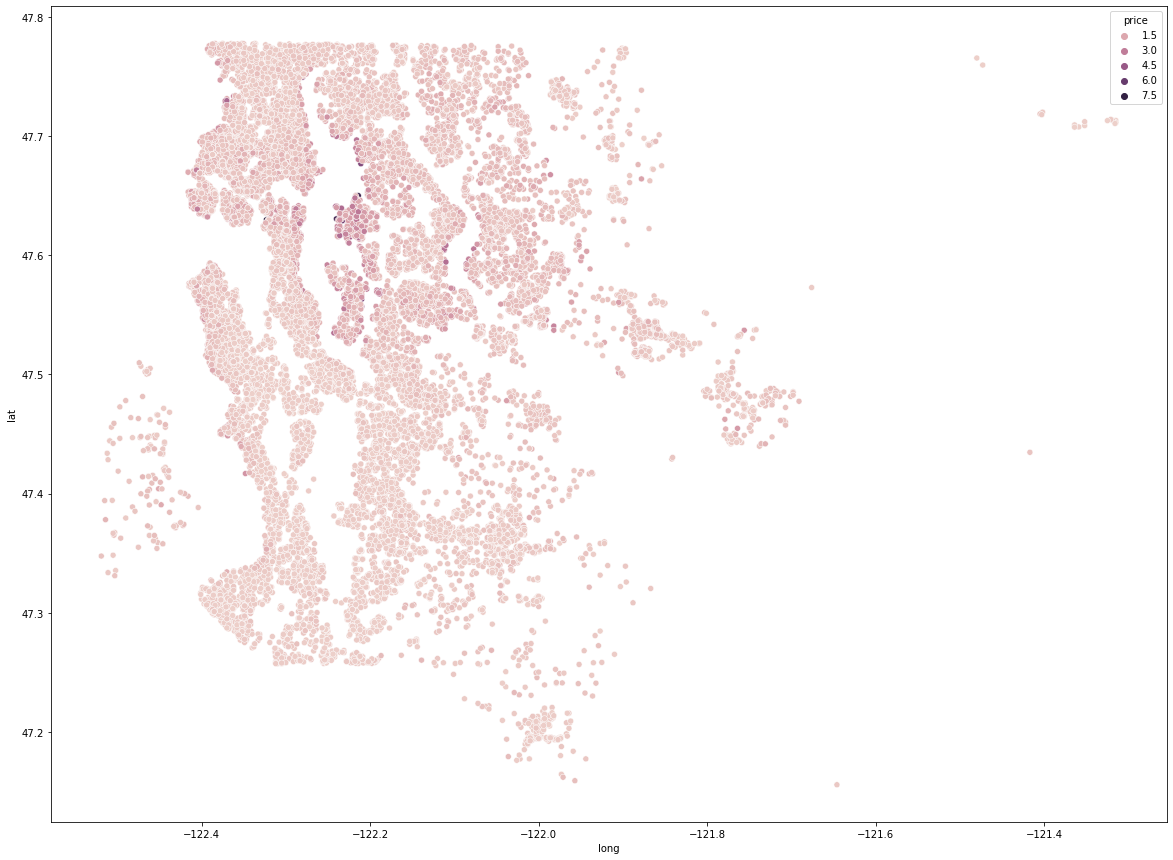

In [23]:
fig, ax = plt.subplots(figsize=(20,15))

sns.scatterplot(x='long', y='lat', hue='price', data=kc);

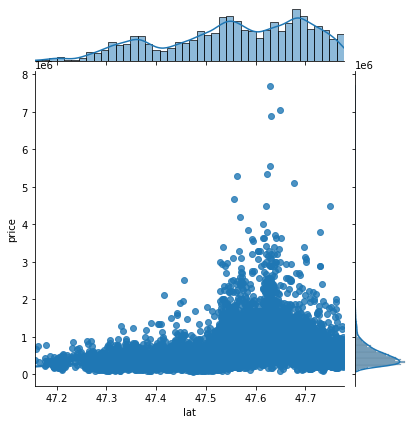

In [24]:
sns.jointplot('lat', 'price', data= kc, kind='reg')

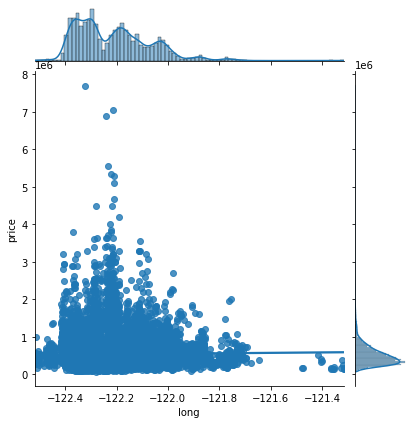

In [25]:
sns.jointplot('long', 'price', data= kc, kind='reg')

While not exact, prices seems to be the highest around coordinates (47.62, -122.25) and seem to to fall off the further away it is.  This location is very close to Medina, so I will use that as a center point.  

In [121]:
from mpl_toolkits import mplot3d

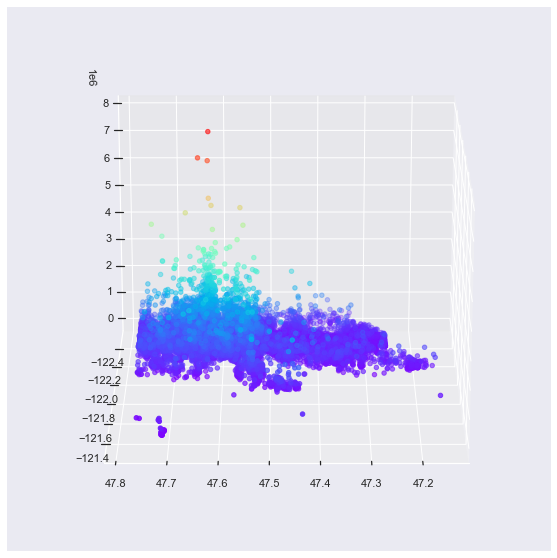

In [139]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')

ax.scatter3D(kc['lat'], kc['long'], kc['price'], c=kc['price'], cmap='rainbow')
ax.view_init(20, 90);

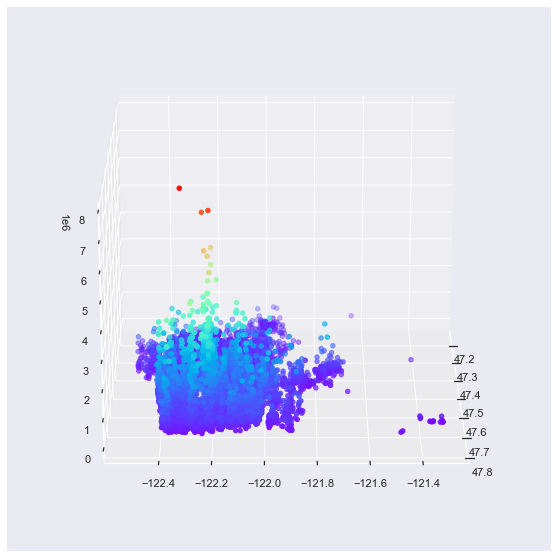

In [138]:
ig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')

ax.scatter3D(kc['lat'], kc['long'], kc['price'], c=kc['price'], cmap='rainbow')
ax.view_init(20, 0);

### New column for distance from downtown Medina

In [26]:
kc_rad=pd.DataFrame()
kc_rad[['lat_rad','long_rad']] = (
    np.radians(kc.loc[:,['lat','long']])
)

In [27]:
kc_rad.head()

,lat_rad,long_rad
0,0.829227,-2.133787
1,0.832889,-2.134869
2,0.833184,-2.133368
3,0.829394,-2.136161
4,0.831070,-2.130087


In [28]:
medina = pd.DataFrame({
    'lat': [47.6209],
    'long': [-122.2276]
})

medina[['lat_rad','long_rad']] = (
    np.radians(medina.loc[:,['lat','long']])
)

medina

,lat,long,lat_rad,long_rad
0,47.6209,-122.2276,0.831141,-2.133274


In [29]:
R = 3959

lat1 = medina['lat_rad']
lon1 = medina['long_rad']

def dist(x, y):
    lat2 = x
    lon2 = y
    
    dlon = y - lon1
    dlat = x - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c

    return distance

In [30]:
kc['dist_to_med'] = kc_rad.apply(lambda r: dist(r['lat_rad'],r['long_rad']),axis=1)

In [31]:
kc.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,dist_to_med
0,221900.0,3,1.00,1180,5650,1.0,NO,NONE,Average,7 Average,1180,0.0,1955,0,98178,47.5112,-122.257,1340,5650,7.702943
1,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991,98125,47.7210,-122.319,1690,7639,8.119514
2,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,0,98028,47.7379,-122.233,2720,8062,8.088320
3,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0,98136,47.5208,-122.393,1360,5000,10.358350
4,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0,98074,47.6168,-122.045,1800,7503,8.509470


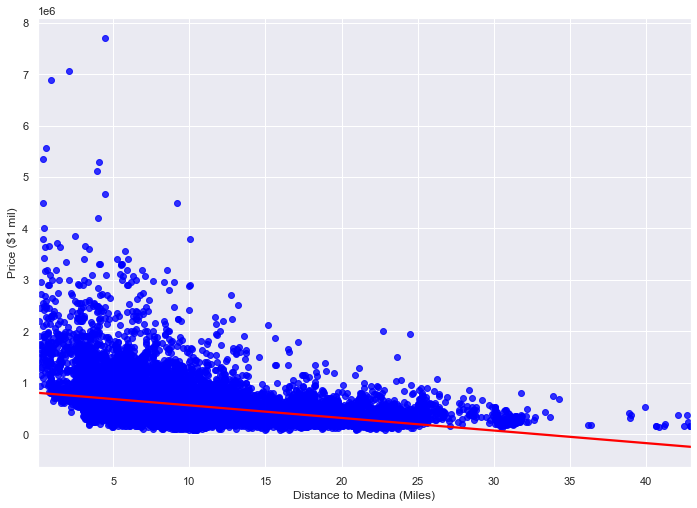

In [32]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
m = sns.regplot(kc['dist_to_med'], kc['price'], ci=None, scatter_kws={"color": "blue"}, line_kws={"color": "red"});
m.set(xlabel = "Distance to Medina (Miles)", ylabel = 'Price ($1 mil)');

Here we can clearly see a 

In [33]:
loc_col = ['price', 'zipcode', 'lat', 'long', 'dist_to_med']
kc_loc = kc[loc_col]
kc_loc.head()

,price,zipcode,lat,long,dist_to_med
0,221900.0,98178,47.5112,-122.257,7.702943
1,538000.0,98125,47.7210,-122.319,8.119514
2,180000.0,98028,47.7379,-122.233,8.088320
3,604000.0,98136,47.5208,-122.393,10.358350
4,510000.0,98074,47.6168,-122.045,8.509470


In [34]:
def group_dist(dist):
    
    if dist < 5:
        return '<5 miles'
    elif dist >= 5 and dist < 10:
        return '5-10 miles'
    elif dist >= 10 and dist < 15:
        return '10-15 miles'
    elif dist >= 15 and dist < 20:
        return '15-20 miles'
    else:
        return '>20 miles'

# Create new feature based on the values returned from function
kc_loc['dist_group'] = kc_loc['dist_to_med'].apply(group_dist)

kc_loc.head()

,price,zipcode,lat,long,dist_to_med,dist_group
0,221900.0,98178,47.5112,-122.257,7.702943,5-10 miles
1,538000.0,98125,47.7210,-122.319,8.119514,5-10 miles
2,180000.0,98028,47.7379,-122.233,8.088320,5-10 miles
3,604000.0,98136,47.5208,-122.393,10.358350,10-15 miles
4,510000.0,98074,47.6168,-122.045,8.509470,5-10 miles


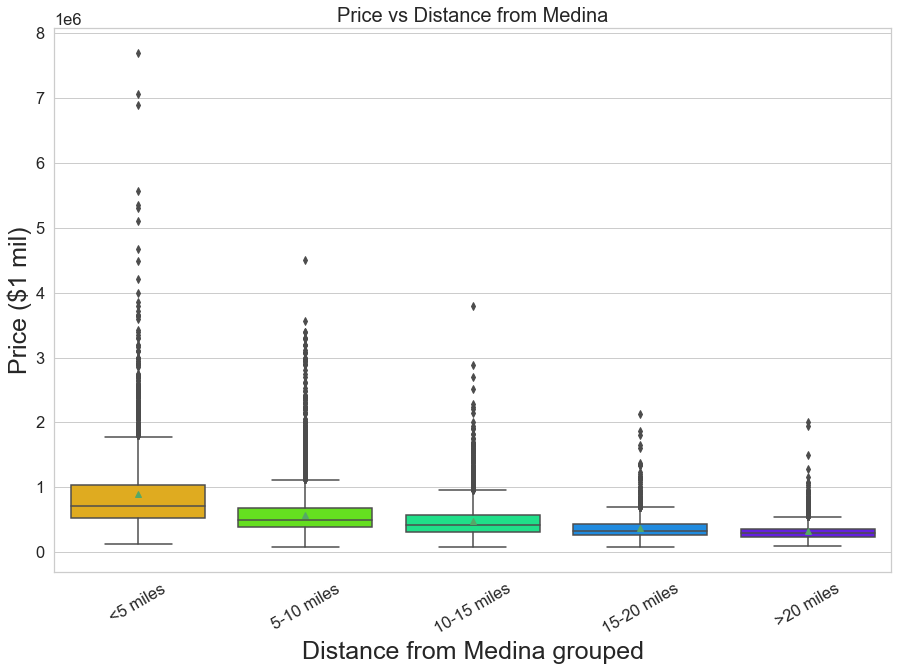

In [35]:
# Create a plot and set the size.
plt.figure(figsize=(15,10))

# Increase the size of the scale text.
sns.set(font_scale=1.5)

#sets the background color
sns.set_style("whitegrid")

# Plot the data
sns.boxplot(x=kc_loc['dist_group'],
            y=kc_loc['price'], palette='gist_rainbow', showmeans=True,
           order=['<5 miles', '5-10 miles', '10-15 miles', '15-20 miles', '>20 miles'])

# Set the barplot's title.
plt.title('Price vs Distance from Medina', fontsize=20)

# Label the y-axis
plt.ylabel('Price ($1 mil)', fontsize=25)

# Label the x-axis
plt.xlabel('Distance from Medina grouped', fontsize=25)

#Angles the x-axis information
plt.xticks(rotation=30);

In [36]:
kc_loc.dist_group.value_counts()/len(kc)

5-10 miles     0.462286
10-15 miles    0.190999
<5 miles       0.125480
15-20 miles    0.111265
>20 miles      0.109969
Name: dist_group, dtype: float64

In [37]:
kc_dist = kc_loc.groupby('dist_group').agg({'price': ['mean', 'min', 'max']})
kc_dist

price                     
                      mean       min        max
dist_group                                     
10-15 miles  472299.551030   78000.0  3800000.0
15-20 miles  366584.045360   85000.0  2130000.0
5-10 miles   566247.721755   82000.0  4500000.0
<5 miles     894532.392989  130000.0  7700000.0
>20 miles    320862.294737   86500.0  2000000.0

## House Characteristics

In [38]:
kc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     21597 non-null  object 
 7   view           21597 non-null  object 
 8   condition      21597 non-null  object 
 9   grade          21597 non-null  object 
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  float64
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   21597 non-null  int64  
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  int64  
 18  sqft_l

In [39]:
# house = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront',
#         'views', 'condition', 'grade', 'sqft_above', 'sqft_basement']
kc_house = kc.drop(columns=['zipcode', 'lat', 'long', 'dist_to_med'])

kc_house.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,NO,NONE,Average,7 Average,1180,0.0,1955,0,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991,1690,7639
2,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,0,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0,1800,7503


In [40]:
kc_house['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [41]:
kc_house.loc[kc_house['bedrooms'] == 33]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
15856,640000.0,33,1.75,1620,6000,1.0,NO,NONE,Very Good,7 Average,1040,580.0,1947,0,1330,4700


In [42]:
kc_house.drop(labels=15856, axis=0, inplace=True)

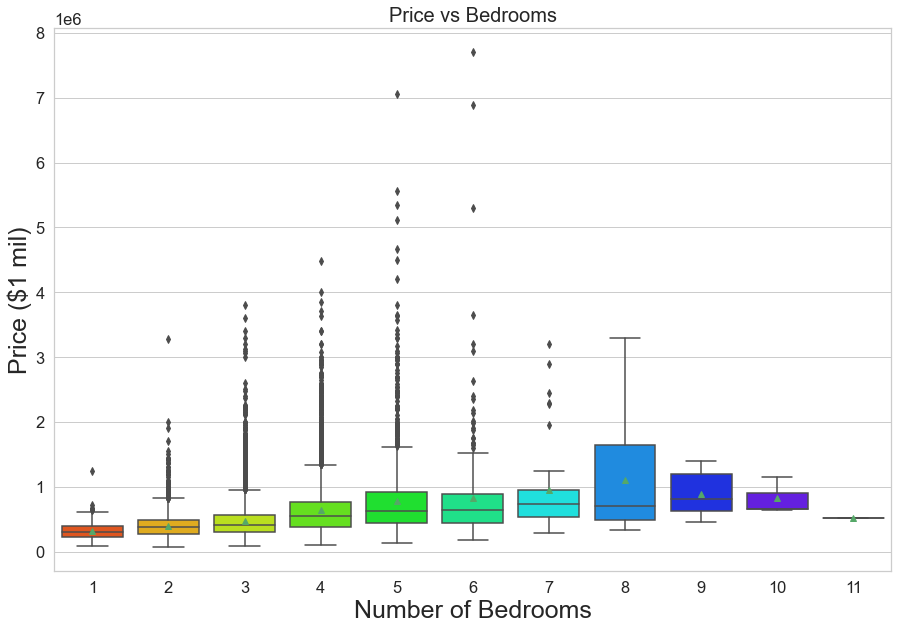

In [43]:
# Create a plot and set the size.
plt.figure(figsize=(15,10))

# Increase the size of the scale text.
sns.set(font_scale=1.5)

#sets the background color
sns.set_style("whitegrid")

# Plot the data
sns.boxplot(x=kc_house['bedrooms'],
            y=kc_house['price'], palette='gist_rainbow', showmeans=True)

# Set the barplot's title.
plt.title('Price vs Bedrooms', fontsize=20)

# Label the y-axis
plt.ylabel('Price ($1 mil)', fontsize=25)

# Label the x-axis
plt.xlabel('Number of Bedrooms', fontsize=25);

In [44]:
kc_bed = kc_house.groupby('bedrooms').agg({'price': ['mean', 'median', 'min', 'max']})
kc_bed

price                               
                  mean    median       min        max
bedrooms                                             
1         3.182395e+05  299000.0   80000.0  1250000.0
2         4.013877e+05  374000.0   78000.0  3280000.0
3         4.662766e+05  413000.0   82000.0  3800000.0
4         6.355647e+05  549997.5  100000.0  4490000.0
5         7.868741e+05  620000.0  133000.0  7060000.0
6         8.258535e+05  650000.0  175000.0  7700000.0
7         9.514478e+05  728580.0  280000.0  3200000.0
8         1.105077e+06  700000.0  340000.0  3300000.0
9         8.939998e+05  817000.0  450000.0  1400000.0
10        8.200000e+05  660000.0  650000.0  1150000.0
11        5.200000e+05  520000.0  520000.0   520000.0

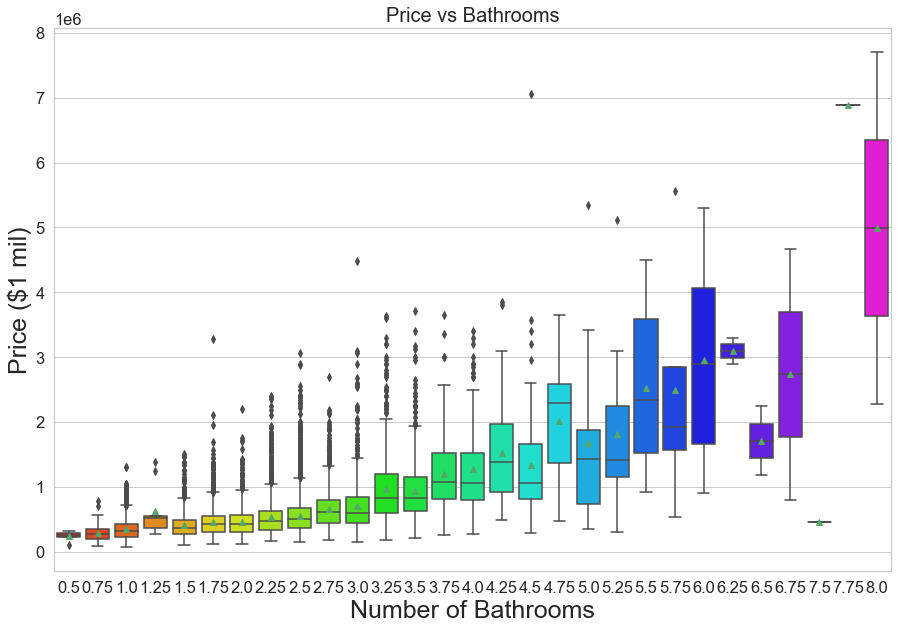

In [45]:
# Create a plot and set the size.
plt.figure(figsize=(15,10))

# Increase the size of the scale text.
sns.set(font_scale=1.5)

#sets the background color
sns.set_style("whitegrid")

# Plot the data
sns.boxplot(x=kc_house['bathrooms'],
            y=kc_house['price'], palette='gist_rainbow', showmeans=True)

# Set the barplot's title.
plt.title('Price vs Bathrooms', fontsize=20)

# Label the y-axis
plt.ylabel('Price ($1 mil)', fontsize=25)

# Label the x-axis
plt.xlabel('Number of Bathrooms', fontsize=25);

In [46]:
kc_bath = kc_house.groupby('bathrooms').agg({'price': ['mean', 'median', 'min', 'max']})
kc_bath

price                                 
                   mean     median        min        max
bathrooms                                               
0.50       2.373750e+05   264000.0   109000.0   312500.0
0.75       2.949366e+05   275000.0    80000.0   785000.0
1.00       3.470721e+05   320000.0    78000.0  1300000.0
1.25       6.217722e+05   516500.0   275000.0  1390000.0
1.50       4.094297e+05   370000.0   107000.0  1500000.0
1.75       4.548551e+05   422800.0   115000.0  3280000.0
2.00       4.579050e+05   423250.0   115000.0  2200000.0
2.25       5.337688e+05   472500.0   160000.0  2400000.0
2.50       5.538033e+05   499950.0   153503.0  3070000.0
2.75       6.603505e+05   605000.0   183750.0  2700000.0
3.00       7.086619e+05   600000.0   154000.0  4490000.0
3.25       9.707532e+05   835000.0   176000.0  3640000.0
3.50       9.324017e+05   820000.0   216650.0  3710000.0
3.75       1.198179e+06  1070000.0   255000.0  3650000.0
4.00       1.268405e+06  1055000.0   265000.0  3400000.0
4.25       1.526653e+06  1380000.0   490000.0  3850000.0
4.50       1.334211e+06  1060000.0   290000.0  7060000.0
4.75       2.022300e+06  2300000.0   480000.0  3650000.0
5.00       1.674167e+06  1430000.0   343000.0  5350000.0
5.25       1.817962e+06  1420000.0   300000.0  5110000.0
5.50       2.522500e+06  2340000.0   925000.0  4500000.0
5.75       2.492500e+06  1930000.0   540000.0  5570000.0
6.00       2.948333e+06  2895000.0   900000.0  5300000.0
6.25       3.095000e+06  3095000.0  2890000.0  3300000.0
6.50       1.710000e+06  1710000.0  1180000.0  2240000.0
6.75       2.735000e+06  2735000.0   800000.0  4670000.0
7.50       4.500000e+05   450000.0   450000.0   450000.0
7.75       6.890000e+06  6890000.0  6890000.0  6890000.0
8.00       4.990000e+06  4990000.0  2280000.0  7700000.0

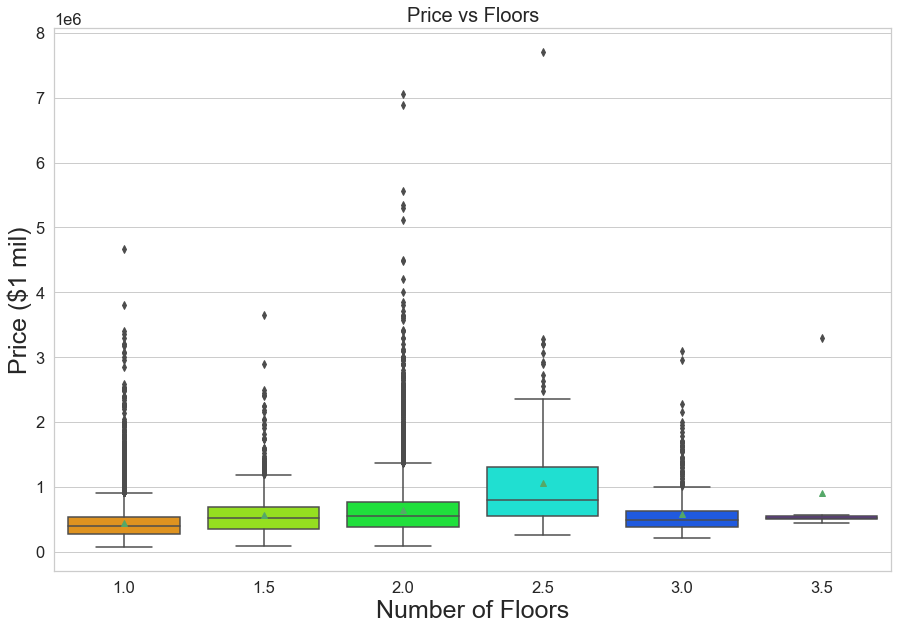

In [47]:
# Create a plot and set the size.
plt.figure(figsize=(15,10))

# Increase the size of the scale text.
sns.set(font_scale=1.5)

#sets the background color
sns.set_style("whitegrid")

# Plot the data
sns.boxplot(x=kc_house['floors'],
            y=kc_house['price'], palette='gist_rainbow', showmeans=True)

# Set the barplot's title.
plt.title('Price vs Floors', fontsize=20)

# Label the y-axis
plt.ylabel('Price ($1 mil)', fontsize=25)

# Label the x-axis
plt.xlabel('Number of Floors', fontsize=25);

In [48]:
kc_floor = kc_house.groupby('floors').agg({'price': ['mean', 'median', 'min', 'max']})
kc_floor

price                               
                mean    median       min        max
floors                                             
1.0     4.423399e+05  390000.0   78000.0  4670000.0
1.5     5.590449e+05  524475.0   92000.0  3650000.0
2.0     6.491856e+05  543000.0   90000.0  7060000.0
2.5     1.061021e+06  799200.0  255000.0  7700000.0
3.0     5.834339e+05  491000.0  205000.0  3100000.0
3.5     9.102143e+05  525000.0  435000.0  3300000.0

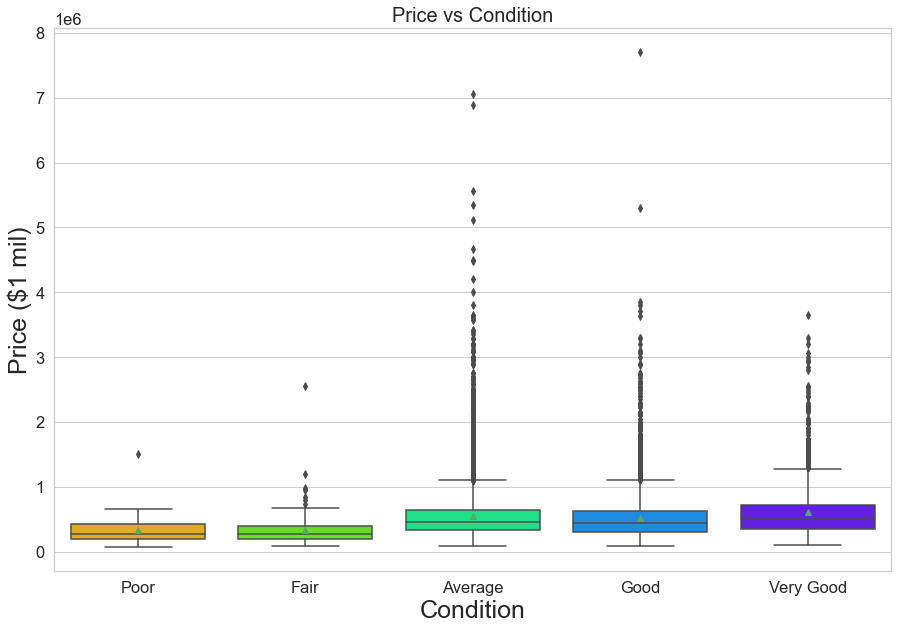

In [49]:
# Create a plot and set the size.
plt.figure(figsize=(15,10))

# Increase the size of the scale text.
sns.set(font_scale=1.5)

#sets the background color
sns.set_style("whitegrid")

# Plot the data
sns.boxplot(x=kc_house['condition'],
            y=kc_house['price'], palette='gist_rainbow', showmeans=True,
           order = ['Poor', 'Fair', 'Average', 'Good', 'Very Good'])

# Set the barplot's title.
plt.title('Price vs Condition', fontsize=20)

# Label the y-axis
plt.ylabel('Price ($1 mil)', fontsize=25)

# Label the x-axis
plt.xlabel('Condition', fontsize=25);

In [50]:
kc_cond = kc_house.groupby('condition').agg({'price': ['mean', 'median', 'min', 'max']})
kc_cond

price                               
                    mean    median       min        max
condition                                              
Average    542173.057347  450250.0   82000.0  7060000.0
Fair       328178.758824  279000.0   80000.0  2560000.0
Good       521374.450414  440000.0   89000.0  7700000.0
Poor       341067.241379  270000.0   78000.0  1500000.0
Very Good  612561.611765  525944.0  110000.0  3650000.0

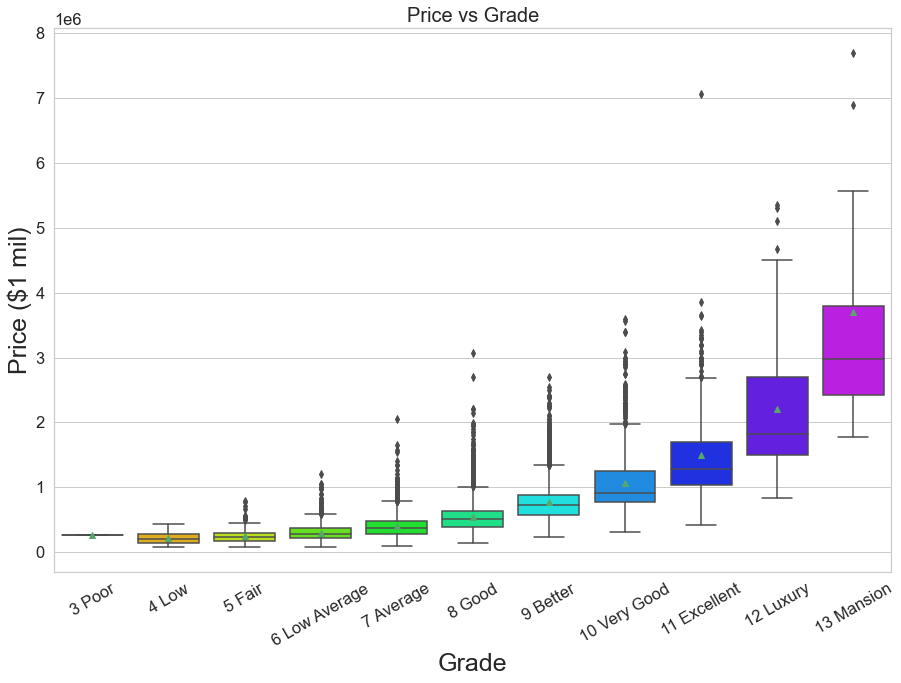

In [51]:
# Create a plot and set the size.
plt.figure(figsize=(15,10))

# Increase the size of the scale text.
sns.set(font_scale=1.5)

#sets the background color
sns.set_style("whitegrid")

# Plot the data
sns.boxplot(x=kc_house['grade'],
            y=kc_house['price'], palette='gist_rainbow', showmeans=True,
           order = ['3 Poor', '4 Low', '5 Fair', '6 Low Average', '7 Average',
                   '8 Good', '9 Better', '10 Very Good', '11 Excellent',
                   '12 Luxury', '13 Mansion'])

# Set the barplot's title.
plt.title('Price vs Grade', fontsize=20)

# Label the y-axis
plt.ylabel('Price ($1 mil)', fontsize=25)

# Label the x-axis
plt.xlabel('Grade', fontsize=25)

#Angles the x-axis information
plt.xticks(rotation=30);

In [52]:
kc_grade = kc_house.groupby('grade').agg({'price': ['mean', 'median', 'min', 'max']})
kc_grade

price                                 
                       mean     median        min        max
grade                                                       
10 Very Good   1.072347e+06   914327.0   316000.0  3600000.0
11 Excellent   1.497792e+06  1280000.0   420000.0  7060000.0
12 Luxury      2.202528e+06  1820000.0   835000.0  5350000.0
13 Mansion     3.710769e+06  2980000.0  1780000.0  7700000.0
3 Poor         2.620000e+05   262000.0   262000.0   262000.0
4 Low          2.120019e+05   200000.0    80000.0   435000.0
5 Fair         2.485240e+05   228700.0    78000.0   795000.0
6 Low Average  3.019166e+05   275276.5    82000.0  1200000.0
7 Average      4.025681e+05   375000.0    90000.0  2050000.0
8 Good         5.429868e+05   510000.0   140000.0  3070000.0
9 Better       7.737382e+05   720000.0   230000.0  2700000.0

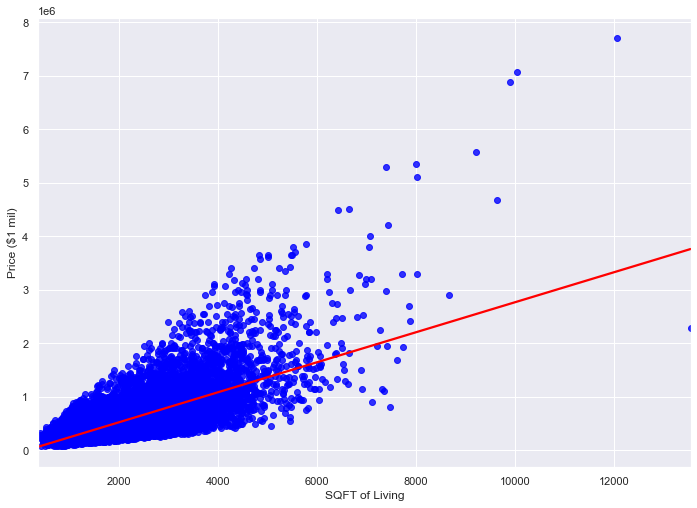

In [53]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
m = sns.regplot(kc_house['sqft_living'], kc_house['price'], ci=None, scatter_kws={"color": "blue"}, line_kws={"color": "red"});
m.set(xlabel = "SQFT of Living", ylabel = 'Price ($1 mil)');

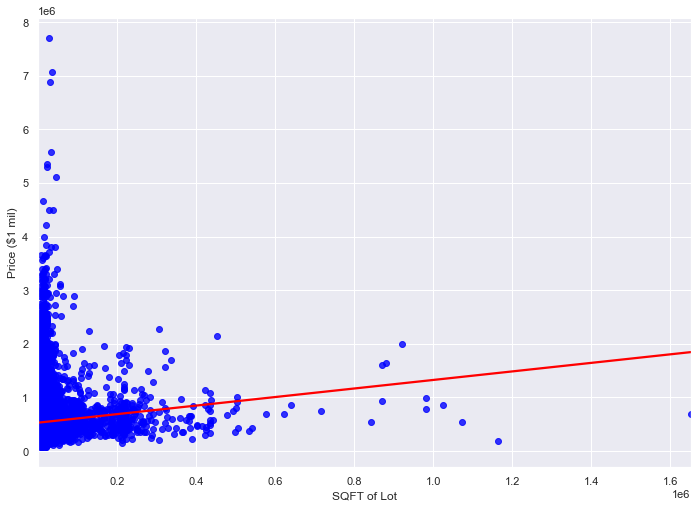

In [54]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
m = sns.regplot(kc_house['sqft_lot'], kc_house['price'], ci=None, scatter_kws={"color": "blue"}, line_kws={"color": "red"});
m.set(xlabel = "SQFT of Lot", ylabel = 'Price ($1 mil)');

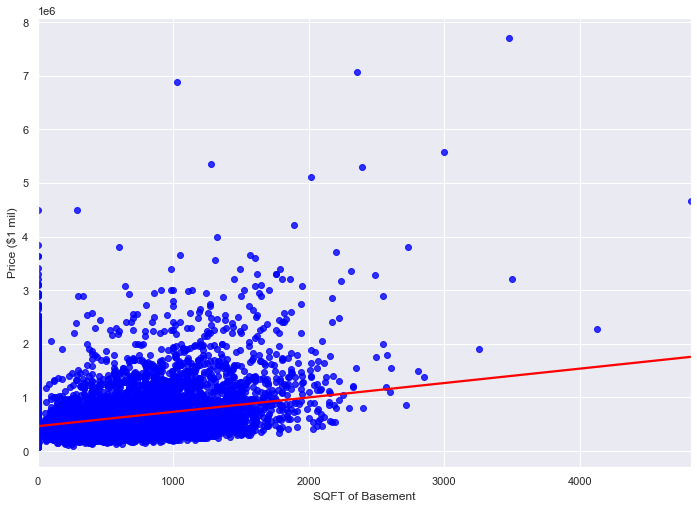

In [55]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
m = sns.regplot(kc_house['sqft_basement'], kc_house['price'], ci=None, scatter_kws={"color": "blue"}, line_kws={"color": "red"});
m.set(xlabel = "SQFT of Basement", ylabel = 'Price ($1 mil)');

In [56]:
kc_house['basement'] = np.where(kc_house['sqft_basement']==0, 0, 1)

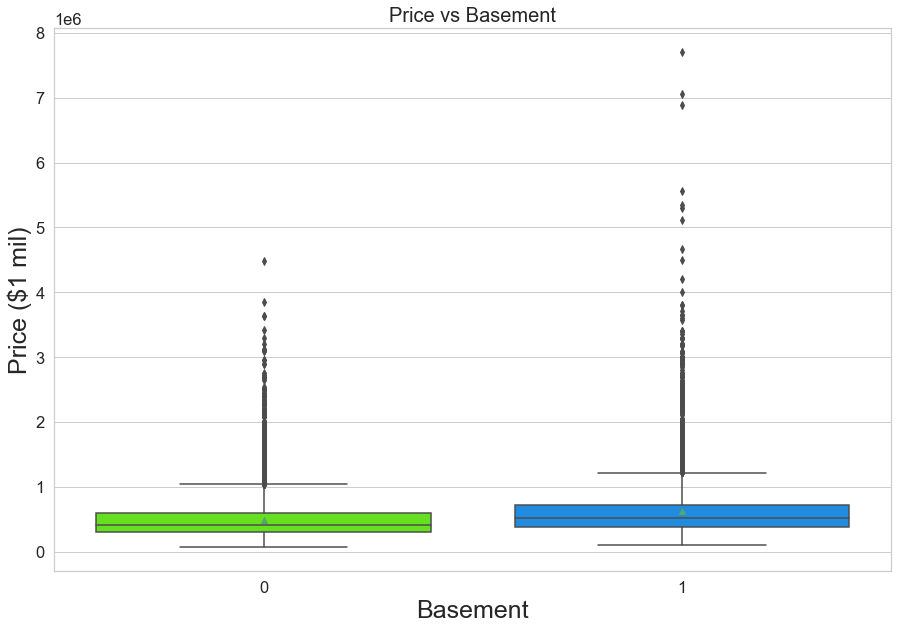

In [57]:
# Create a plot and set the size.
plt.figure(figsize=(15,10))

# Increase the size of the scale text.
sns.set(font_scale=1.5)

#sets the background color
sns.set_style("whitegrid")

# Plot the data
sns.boxplot(x=kc_house['basement'],
            y=kc_house['price'], palette='gist_rainbow', showmeans=True)

# Set the barplot's title.
plt.title('Price vs Basement', fontsize=20)

# Label the y-axis
plt.ylabel('Price ($1 mil)', fontsize=25)

# Label the x-axis
plt.xlabel('Basement', fontsize=25);

In [58]:
kc_base = kc_house.groupby('basement').agg({'price': ['mean', 'median', 'min', 'max']})
kc_base

price                               
                   mean    median       min        max
basement                                              
0         488471.703163  415000.0   78000.0  4490000.0
1         623044.838865  515000.0  100000.0  7700000.0

In [59]:
kc_house['renovated'] = np.where(kc_house['yr_renovated']==0, 0, 1)

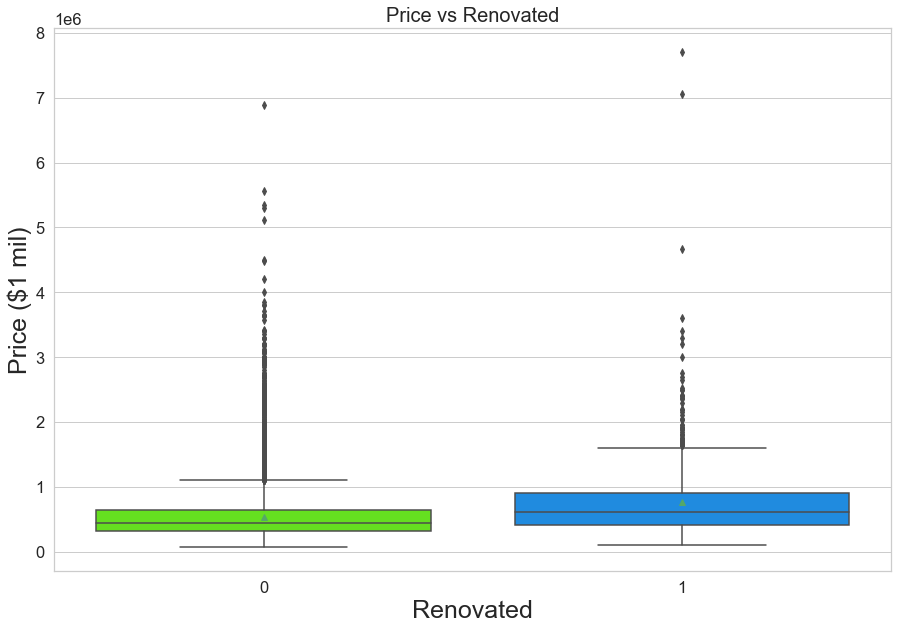

In [60]:
# Create a plot and set the size.
plt.figure(figsize=(15,10))

# Increase the size of the scale text.
sns.set(font_scale=1.5)

#sets the background color
sns.set_style("whitegrid")

# Plot the data
sns.boxplot(x=kc_house['renovated'],
            y=kc_house['price'], palette='gist_rainbow', showmeans=True)

# Set the barplot's title.
plt.title('Price vs Renovated', fontsize=20)

# Label the y-axis
plt.ylabel('Price ($1 mil)', fontsize=25)

# Label the x-axis
plt.xlabel('Renovated', fontsize=25);

In [61]:
kc_reno = kc_house.groupby('renovated').agg({'price': ['mean', 'median', 'min', 'max']})
kc_reno

price                               
                    mean    median       min        max
renovated                                              
0          532135.147228  449000.0   78000.0  6890000.0
1          768901.892473  607502.0  110000.0  7700000.0

In [62]:
kc_house['yrs_since_reno'] = np.where(kc_house['yr_renovated']==0, 2022-kc_house['yr_built'], 2022-kc_house['yr_renovated'])

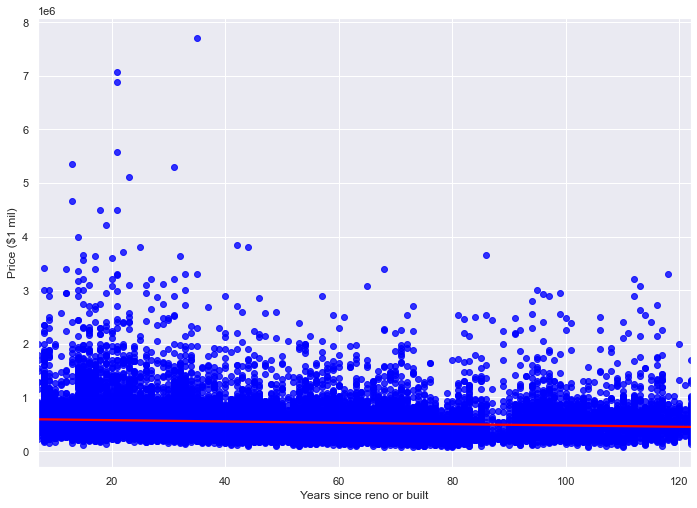

In [63]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
m = sns.regplot(kc_house['yrs_since_reno'], kc_house['price'], ci=None, scatter_kws={"color": "blue"}, line_kws={"color": "red"});
m.set(xlabel = "Years since reno or built", ylabel = 'Price ($1 mil)');

# Convert Categorical Features into Numbers

In [64]:
cat = ['waterfront', 'view', 'condition', 'grade']
kc_cat = kc[cat]
kc_cat.head()

,waterfront,view,condition,grade
0,NO,NONE,Average,7 Average
1,NO,NONE,Average,7 Average
2,NO,NONE,Average,6 Low Average
3,NO,NONE,Very Good,7 Average
4,NO,NONE,Average,8 Good


In [65]:
for x in cat:
    print(x.upper())
    print (kc_cat[x].value_counts())
    print()

WATERFRONT
NO     21451
YES      146
Name: waterfront, dtype: int64

VIEW
NONE         19485
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

CONDITION
Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

GRADE
7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64



## Binary Categories

In [66]:
# Create a variable water that contains the relevant column from kc
water = kc_cat[['waterfront']]

# Instantiate an OrdinalEncoder
encoder_water = OrdinalEncoder()

# Fit the encoder on street_train
encoder_water.fit(water)

# Inspect the categories of the fitted encoder
encoder_water.categories_[0]

array(['NO', 'YES'], dtype=object)

In [67]:
# Transform water using the encoder and assign the result to water_encoded
water_encoded = encoder_water.transform(water)

# Flatten for appropriate shape
water_encoded = water_encoded.flatten()

# Visually inspect water_encoded
water_encoded

array([0., 0., 0., ..., 0., 0., 0.])

In [68]:
# Replace value of water
kc_cat["waterfront"] = water_encoded.astype(int)

# Visually inspect kc
kc_cat

,waterfront,view,condition,grade
0,0,NONE,Average,7 Average
1,0,NONE,Average,7 Average
2,0,NONE,Average,6 Low Average
3,0,NONE,Very Good,7 Average
4,0,NONE,Average,8 Good
...,...,...,...,...
21592,0,NONE,Average,8 Good
21593,0,NONE,Average,8 Good
21594,0,NONE,Average,7 Average
21595,0,NONE,Average,8 Good


In [69]:
kc_cat.waterfront.value_counts()

0    21451
1      146
Name: waterfront, dtype: int64

## Multiple Categories

### View

In [70]:
# Create a variable view extracted from kc
view = kc_cat[["view"]]

# Instantiate a OneHotEncoder
ohe = OneHotEncoder(categories="auto",sparse=False, handle_unknown="ignore")

# Fit the encoder on view
ohe.fit(view)

# Inspect the categories of the fitted encoder
ohe.categories_

[array(['AVERAGE', 'EXCELLENT', 'FAIR', 'GOOD', 'NONE'], dtype=object)]

In [71]:
# Transform view using the encoder and
# assign the result to view_encoded
view_encoded = ohe.transform(view)

# Visually inspect view_encoded
view_encoded

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]])

In [72]:
# Make the transformed data into a dataframe
view_encoded = pd.DataFrame(
    # Pass in NumPy array
    view_encoded,
    
    # Set the index to match kc's index
    index=kc.index
)

view_encoded.columns = ohe.get_feature_names(['view'])

view_encoded.drop(columns='view_NONE', inplace=True)

# Visually inspect new dataframe
view_encoded

,view_AVERAGE,view_EXCELLENT,view_FAIR,view_GOOD
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0
...,...,...,...,...
21592,0.0,0.0,0.0,0.0
21593,0.0,0.0,0.0,0.0
21594,0.0,0.0,0.0,0.0
21595,0.0,0.0,0.0,0.0


In [73]:
# Drop original view column
kc_cat.drop("view", axis=1, inplace=True)

# Visually inspect kc
kc_cat

,waterfront,condition,grade
0,0,Average,7 Average
1,0,Average,7 Average
2,0,Average,6 Low Average
3,0,Very Good,7 Average
4,0,Average,8 Good
...,...,...,...
21592,0,Average,8 Good
21593,0,Average,8 Good
21594,0,Average,7 Average
21595,0,Average,8 Good


In [74]:
# Concatenate the new dataframe with current kc
kc_cat = pd.concat([kc_cat, view_encoded], axis=1)

# Visually inspect kc
kc_cat


,waterfront,condition,grade,view_AVERAGE,view_EXCELLENT,view_FAIR,view_GOOD
0,0,Average,7 Average,0.0,0.0,0.0,0.0
1,0,Average,7 Average,0.0,0.0,0.0,0.0
2,0,Average,6 Low Average,0.0,0.0,0.0,0.0
3,0,Very Good,7 Average,0.0,0.0,0.0,0.0
4,0,Average,8 Good,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
21592,0,Average,8 Good,0.0,0.0,0.0,0.0
21593,0,Average,8 Good,0.0,0.0,0.0,0.0
21594,0,Average,7 Average,0.0,0.0,0.0,0.0
21595,0,Average,8 Good,0.0,0.0,0.0,0.0


In [75]:
kc_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   waterfront      21597 non-null  int64  
 1   condition       21597 non-null  object 
 2   grade           21597 non-null  object 
 3   view_AVERAGE    21597 non-null  float64
 4   view_EXCELLENT  21597 non-null  float64
 5   view_FAIR       21597 non-null  float64
 6   view_GOOD       21597 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 1.2+ MB


### Grade

In [76]:
kc_cat.grade = kc_cat.grade.str.replace(' ','_')

In [77]:
# Create a variable grade extracted from kc
grade = kc_cat[["grade"]]

# Fit the encoder on grade
ohe.fit(grade)

# Inspect the categories of the fitted encoder
ohe.categories_

[array(['10_Very_Good', '11_Excellent', '12_Luxury', '13_Mansion',
        '3_Poor', '4_Low', '5_Fair', '6_Low_Average', '7_Average',
        '8_Good', '9_Better'], dtype=object)]

In [78]:
# Transform view using the encoder and
# assign the result to grade_encoded
grade_encoded = ohe.transform(grade)

# Visually inspect view_encoded
grade_encoded

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [79]:
# Make the transformed data into a dataframe
grade_encoded = pd.DataFrame(
    # Pass in NumPy array
    grade_encoded,
    
    # Set the index to match kc's index
    index=kc_cat.index
)

grade_encoded.columns = ohe.get_feature_names(['grade'])

# Visually inspect new dataframe
grade_encoded

,grade_10_Very_Good,grade_11_Excellent,grade_12_Luxury,grade_13_Mansion,grade_3_Poor,grade_4_Low,grade_5_Fair,grade_6_Low_Average,grade_7_Average,grade_8_Good,grade_9_Better
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
21592,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
21593,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
21594,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
21595,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [80]:
# Drop original grade column
kc_cat.drop("grade", axis=1, inplace=True)

# Visually inspect kc
kc_cat

,waterfront,condition,view_AVERAGE,view_EXCELLENT,view_FAIR,view_GOOD
0,0,Average,0.0,0.0,0.0,0.0
1,0,Average,0.0,0.0,0.0,0.0
2,0,Average,0.0,0.0,0.0,0.0
3,0,Very Good,0.0,0.0,0.0,0.0
4,0,Average,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
21592,0,Average,0.0,0.0,0.0,0.0
21593,0,Average,0.0,0.0,0.0,0.0
21594,0,Average,0.0,0.0,0.0,0.0
21595,0,Average,0.0,0.0,0.0,0.0


In [81]:
# Concatenate the new dataframe with current kc
kc_cat = pd.concat([kc_cat, grade_encoded], axis=1)

# Visually inspect kc
kc_cat

,waterfront,condition,view_AVERAGE,view_EXCELLENT,view_FAIR,view_GOOD,grade_10_Very_Good,grade_11_Excellent,grade_12_Luxury,grade_13_Mansion,grade_3_Poor,grade_4_Low,grade_5_Fair,grade_6_Low_Average,grade_7_Average,grade_8_Good,grade_9_Better
0,0,Average,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0,Average,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0,Average,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0,Very Good,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0,Average,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,0,Average,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
21593,0,Average,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
21594,0,Average,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
21595,0,Average,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [82]:
kc_cat.drop(columns=['grade_3_Poor'], inplace=True)

In [83]:
kc_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   waterfront           21597 non-null  int64  
 1   condition            21597 non-null  object 
 2   view_AVERAGE         21597 non-null  float64
 3   view_EXCELLENT       21597 non-null  float64
 4   view_FAIR            21597 non-null  float64
 5   view_GOOD            21597 non-null  float64
 6   grade_10_Very_Good   21597 non-null  float64
 7   grade_11_Excellent   21597 non-null  float64
 8   grade_12_Luxury      21597 non-null  float64
 9   grade_13_Mansion     21597 non-null  float64
 10  grade_4_Low          21597 non-null  float64
 11  grade_5_Fair         21597 non-null  float64
 12  grade_6_Low_Average  21597 non-null  float64
 13  grade_7_Average      21597 non-null  float64
 14  grade_8_Good         21597 non-null  float64
 15  grade_9_Better       21597 non-null 

### Condition

In [84]:
kc_cat.condition = kc_cat.condition.str.replace(' ','_')

In [85]:
# Create a variable grade extracted from kc
cond = kc_cat[["condition"]]

# Fit the encoder on grade
ohe.fit(cond)

# Inspect the categories of the fitted encoder
ohe.categories_

[array(['Average', 'Fair', 'Good', 'Poor', 'Very_Good'], dtype=object)]

In [86]:
# Transform view using the encoder and
# assign the result to grade_encoded
cond_encoded = ohe.transform(cond)

# Visually inspect view_encoded
cond_encoded

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [87]:
# Make the transformed data into a dataframe
cond_encoded = pd.DataFrame(
    # Pass in NumPy array
    cond_encoded,
    
    # Set the index to match kc's index
    index=kc_cat.index
)

cond_encoded.columns = ohe.get_feature_names(['condition'])

# Visually inspect new dataframe
cond_encoded

,condition_Average,condition_Fair,condition_Good,condition_Poor,condition_Very_Good
0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
21592,1.0,0.0,0.0,0.0,0.0
21593,1.0,0.0,0.0,0.0,0.0
21594,1.0,0.0,0.0,0.0,0.0
21595,1.0,0.0,0.0,0.0,0.0


In [88]:
# Drop original grade column
kc_cat.drop("condition", axis=1, inplace=True)

# Visually inspect kc
kc_cat

,waterfront,view_AVERAGE,view_EXCELLENT,view_FAIR,view_GOOD,grade_10_Very_Good,grade_11_Excellent,grade_12_Luxury,grade_13_Mansion,grade_4_Low,grade_5_Fair,grade_6_Low_Average,grade_7_Average,grade_8_Good,grade_9_Better
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
21593,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
21594,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
21595,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [89]:
# Concatenate the new dataframe with current kc
kc_cat = pd.concat([kc_cat, cond_encoded], axis=1)

# Visually inspect kc
kc_cat

,waterfront,view_AVERAGE,view_EXCELLENT,view_FAIR,view_GOOD,grade_10_Very_Good,grade_11_Excellent,grade_12_Luxury,grade_13_Mansion,grade_4_Low,grade_5_Fair,grade_6_Low_Average,grade_7_Average,grade_8_Good,grade_9_Better,condition_Average,condition_Fair,condition_Good,condition_Poor,condition_Very_Good
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
21593,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
21594,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
21595,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [90]:
kc_cat.drop(columns=['condition_Poor'], inplace=True)

In [91]:
kc_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   waterfront           21597 non-null  int64  
 1   view_AVERAGE         21597 non-null  float64
 2   view_EXCELLENT       21597 non-null  float64
 3   view_FAIR            21597 non-null  float64
 4   view_GOOD            21597 non-null  float64
 5   grade_10_Very_Good   21597 non-null  float64
 6   grade_11_Excellent   21597 non-null  float64
 7   grade_12_Luxury      21597 non-null  float64
 8   grade_13_Mansion     21597 non-null  float64
 9   grade_4_Low          21597 non-null  float64
 10  grade_5_Fair         21597 non-null  float64
 11  grade_6_Low_Average  21597 non-null  float64
 12  grade_7_Average      21597 non-null  float64
 13  grade_8_Good         21597 non-null  float64
 14  grade_9_Better       21597 non-null  float64
 15  condition_Average    21597 non-null 

In [92]:
kc_cat = pd.concat([kc_cat, kc_house['renovated']], axis=1)
kc_cat

,waterfront,view_AVERAGE,view_EXCELLENT,view_FAIR,view_GOOD,grade_10_Very_Good,grade_11_Excellent,grade_12_Luxury,grade_13_Mansion,grade_4_Low,grade_5_Fair,grade_6_Low_Average,grade_7_Average,grade_8_Good,grade_9_Better,condition_Average,condition_Fair,condition_Good,condition_Very_Good,renovated
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
21593,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
21594,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
21595,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [93]:
kc.drop(columns=['waterfront'], axis=1, inplace=True)
kc_dum = pd.concat([kc, kc_cat], axis=1)
kc_dum = kc_dum.drop(columns=['view','grade', 'condition'])
kc_dum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                21597 non-null  float64
 1   bedrooms             21597 non-null  int64  
 2   bathrooms            21597 non-null  float64
 3   sqft_living          21597 non-null  int64  
 4   sqft_lot             21597 non-null  int64  
 5   floors               21597 non-null  float64
 6   sqft_above           21597 non-null  int64  
 7   sqft_basement        21597 non-null  float64
 8   yr_built             21597 non-null  int64  
 9   yr_renovated         21597 non-null  int64  
 10  zipcode              21597 non-null  int64  
 11  lat                  21597 non-null  float64
 12  long                 21597 non-null  float64
 13  sqft_living15        21597 non-null  int64  
 14  sqft_lot15           21597 non-null  int64  
 15  dist_to_med          21597 non-null 

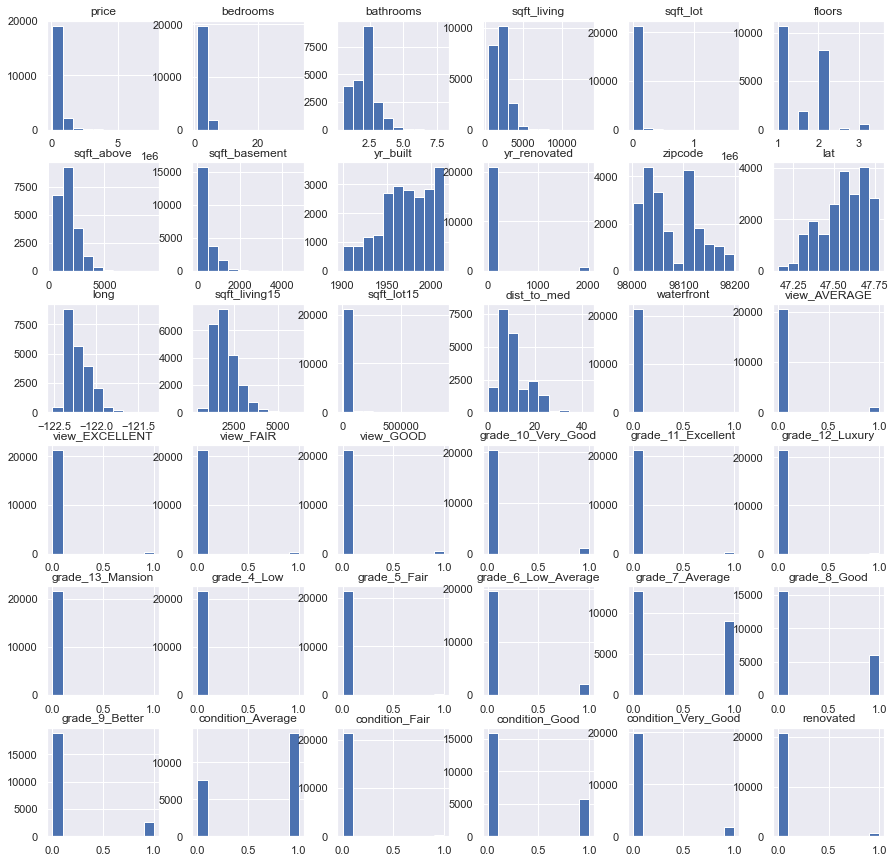

In [94]:
kc_dum.hist(figsize=(15,15));

In [95]:
kc_dum.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,...,grade_5_Fair,grade_6_Low_Average,grade_7_Average,grade_8_Good,grade_9_Better,condition_Average,condition_Fair,condition_Good,condition_Very_Good,renovated
price,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.605368,0.321108,0.053953,0.117855,...,-0.084549,-0.209463,-0.316053,0.004576,0.235859,0.006948,-0.051432,-0.030759,0.057531,0.117546
bedrooms,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,0.479386,0.297229,0.155670,0.017900,...,-0.113175,-0.239492,-0.104791,0.073140,0.160294,0.005210,-0.049463,-0.009841,0.027500,0.018354
bathrooms,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.686668,0.278485,0.507173,0.047177,...,-0.138740,-0.366185,-0.313457,0.189426,0.264756,0.190790,-0.075933,-0.166756,-0.034765,0.046738
sqft_living,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.876448,0.428660,0.318152,0.051060,...,-0.127198,-0.312486,-0.358915,0.071115,0.318499,0.102061,-0.063984,-0.083850,-0.018284,0.050825
sqft_lot,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.184139,0.015031,0.052946,0.004979,...,0.022931,-0.019116,-0.067791,-0.023923,0.049646,-0.011589,0.037871,0.013284,-0.014452,0.005089
floors,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.523989,-0.241866,0.489193,0.003793,...,-0.080346,-0.230529,-0.308247,0.201188,0.244184,0.317725,-0.055337,-0.257672,-0.120546,0.003705
sqft_above,0.605368,0.479386,0.686668,0.876448,0.184139,0.523989,1.000000,-0.051175,0.424037,0.020645,...,-0.108543,-0.280761,-0.387255,0.059423,0.343388,0.194238,-0.057698,-0.142520,-0.088596,0.020558
sqft_basement,0.321108,0.297229,0.278485,0.428660,0.015031,-0.241866,-0.051175,1.000000,-0.130085,0.065008,...,-0.059784,-0.120907,-0.019855,0.035518,0.017906,-0.146163,-0.025163,0.088961,0.124232,0.064681
yr_built,0.053953,0.155670,0.507173,0.318152,0.052946,0.489193,0.424037,-0.130085,1.000000,-0.202555,...,-0.128815,-0.313501,-0.211966,0.199844,0.220104,0.391418,-0.066977,-0.257155,-0.244382,-0.202848
yr_renovated,0.117855,0.017900,0.047177,0.051060,0.004979,0.003793,0.020645,0.065008,-0.202555,1.000000,...,-0.010451,0.002124,-0.017305,0.006465,0.016509,0.064339,-0.008298,-0.052031,-0.026238,0.999968


In [96]:
abs(kc_dum.corr()) > .75

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,...,grade_5_Fair,grade_6_Low_Average,grade_7_Average,grade_8_Good,grade_9_Better,condition_Average,condition_Fair,condition_Good,condition_Very_Good,renovated
price,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,True,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_above,False,False,False,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_basement,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
yr_built,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
yr_renovated,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True


In [97]:
corr=kc_dum.corr().abs().stack().reset_index().sort_values(0, ascending=False)

corr['pairs'] = list(zip(corr.level_0, corr.level_1))

corr.set_index(['pairs'], inplace = True)

corr.drop(columns=['level_1', 'level_0'], inplace = True)

corr.columns = ['cc']

corr.drop_duplicates(inplace=True)

corr[(corr.cc>.75) & (corr.cc <1)]

,cc
pairs,
"(renovated, yr_renovated)",0.999968
"(sqft_living, sqft_above)",0.876448
"(condition_Good, condition_Average)",0.812294
"(sqft_living, sqft_living15)",0.756402
"(bathrooms, sqft_living)",0.755758


In [98]:
kc_dum.drop(columns=['sqft_above', 'yr_renovated', 'sqft_living15', 'sqft_lot15'], inplace=True)

In [99]:
corr=kc_dum.corr().abs().stack().reset_index().sort_values(0, ascending=False)

corr['pairs'] = list(zip(corr.level_0, corr.level_1))

corr.set_index(['pairs'], inplace = True)

corr.drop(columns=['level_1', 'level_0'], inplace = True)

corr.columns = ['cc']

corr.drop_duplicates(inplace=True)

corr[(corr.cc>.75) & (corr.cc <1)]

,cc
pairs,
"(condition_Average, condition_Good)",0.812294
"(bathrooms, sqft_living)",0.755758


In [100]:
pd.set_option('display.max_columns', None)
kc_dum.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_basement,yr_built,zipcode,lat,long,dist_to_med,waterfront,view_AVERAGE,view_EXCELLENT,view_FAIR,view_GOOD,grade_10_Very_Good,grade_11_Excellent,grade_12_Luxury,grade_13_Mansion,grade_4_Low,grade_5_Fair,grade_6_Low_Average,grade_7_Average,grade_8_Good,grade_9_Better,condition_Average,condition_Fair,condition_Good,condition_Very_Good,renovated
0,221900.0,3,1.00,1180,5650,1.0,0.0,1955,98178,47.5112,-122.257,7.702943,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,538000.0,3,2.25,2570,7242,2.0,400.0,1951,98125,47.7210,-122.319,8.119514,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,180000.0,2,1.00,770,10000,1.0,0.0,1933,98028,47.7379,-122.233,8.088320,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,604000.0,4,3.00,1960,5000,1.0,910.0,1965,98136,47.5208,-122.393,10.358350,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,510000.0,3,2.00,1680,8080,1.0,0.0,1987,98074,47.6168,-122.045,8.509470,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


# Model

In [101]:
kc_dum.isnull().sum()

price                  0
bedrooms               0
bathrooms              0
sqft_living            0
sqft_lot               0
floors                 0
sqft_basement          0
yr_built               0
zipcode                0
lat                    0
long                   0
dist_to_med            0
waterfront             0
view_AVERAGE           0
view_EXCELLENT         0
view_FAIR              0
view_GOOD              0
grade_10_Very_Good     0
grade_11_Excellent     0
grade_12_Luxury        0
grade_13_Mansion       0
grade_4_Low            0
grade_5_Fair           0
grade_6_Low_Average    0
grade_7_Average        0
grade_8_Good           0
grade_9_Better         0
condition_Average      0
condition_Fair         0
condition_Good         0
condition_Very_Good    0
renovated              1
dtype: int64

In [102]:
kc_dum = kc_dum.fillna(0)

In [103]:
kc_dum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                21597 non-null  float64
 1   bedrooms             21597 non-null  int64  
 2   bathrooms            21597 non-null  float64
 3   sqft_living          21597 non-null  int64  
 4   sqft_lot             21597 non-null  int64  
 5   floors               21597 non-null  float64
 6   sqft_basement        21597 non-null  float64
 7   yr_built             21597 non-null  int64  
 8   zipcode              21597 non-null  int64  
 9   lat                  21597 non-null  float64
 10  long                 21597 non-null  float64
 11  dist_to_med          21597 non-null  float64
 12  waterfront           21597 non-null  int64  
 13  view_AVERAGE         21597 non-null  float64
 14  view_EXCELLENT       21597 non-null  float64
 15  view_FAIR            21597 non-null 

In [111]:
kc_dum.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long', 'dist_to_med',
       'waterfront', 'view_AVERAGE', 'view_EXCELLENT', 'view_FAIR',
       'view_GOOD', 'grade_10_Very_Good', 'grade_11_Excellent',
       'grade_12_Luxury', 'grade_13_Mansion', 'grade_4_Low', 'grade_5_Fair',
       'grade_6_Low_Average', 'grade_7_Average', 'grade_8_Good',
       'grade_9_Better', 'condition_Average', 'condition_Fair',
       'condition_Good', 'condition_Very_Good', 'renovated'],
      dtype='object')

In [113]:
target = 'price'
x_col = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long', 'dist_to_med',
       'waterfront', 'view_AVERAGE', 'view_EXCELLENT', 'view_FAIR',
       'view_GOOD', 'grade_10_Very_Good', 'grade_11_Excellent',
       'grade_12_Luxury', 'grade_13_Mansion', 'grade_4_Low', 'grade_5_Fair',
       'grade_6_Low_Average', 'grade_7_Average', 'grade_8_Good',
       'grade_9_Better', 'condition_Average', 'condition_Fair',
       'condition_Good', 'condition_Very_Good', 'renovated']

In [117]:
predictors = '+'.join(x_col)

formula = target + '~' + predictors

model = ols(formula=formula, data=kc_dum).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     2158.
Date:                Mon, 05 Sep 2022   Prob (F-statistic):               0.00
Time:                        18:04:38   Log-Likelihood:            -2.9215e+05
No. Observations:               21597   AIC:                         5.844e+05
Df Residuals:                   21565   BIC:                         5.846e+05
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            4.216e+07   2.69e+06     15.684      0.000    3.69e+07    4.74e+07
bedrooms            -2.272e+04   1750.638    -12.978      0.000   -2.62e+04   -1.93e+04
bathrooms            3.834e+04   2959.005     12.958      0.000    3.25e+04    4.41e+04
sqft_living           151.1075      3.180     47.519      0.000     144.875     157.340
sqft_lot                0.1861      0.032      5.854      0.000       0.124       0.248
floors               1.494e+04   3264.879      4.576      0.000    8542.206    2.13e+04
sqft_basement         -22.3714      3.944     -5.673      0.000     -30.102     -14.641
yr_built            -1706.9277     67.188    -25.405      0.000   -1838.622   -1575.234
zipcode              -517.8805     29.905    -17.317      0.000    -576.497    -459.264
lat                  1.497e+05   1.38e+04     10.880      0.000    1.23e+05    1.77e+05
long                -4.365e+04   1.21e+04     -3.600      0.000   -6.74e+04   -1.99e+04
dist_to_med         -1.629e+04    337.828    -48.231      0.000    -1.7e+04   -1.56e+04
waterfront           5.434e+05   1.84e+04     29.506      0.000    5.07e+05     5.8e+05
view_AVERAGE         7.961e+04   6188.782     12.864      0.000    6.75e+04    9.17e+04
view_EXCELLENT       2.842e+05   1.28e+04     22.153      0.000    2.59e+05    3.09e+05
view_FAIR            1.153e+05   1.02e+04     11.298      0.000    9.53e+04    1.35e+05
view_GOOD            1.547e+05   8475.514     18.250      0.000    1.38e+05    1.71e+05
grade_10_Very_Good   5.719e+04   1.82e+05      0.314      0.753   -2.99e+05    4.14e+05
grade_11_Excellent   2.897e+05   1.82e+05      1.590      0.112   -6.74e+04    6.47e+05
grade_12_Luxury      7.305e+05   1.83e+05      3.988      0.000    3.71e+05    1.09e+06
grade_13_Mansion     1.926e+06   1.89e+05     10.173      0.000    1.56e+06     2.3e+06
grade_4_Low         -3.005e+05   1.85e+05     -1.624      0.104   -6.63e+05    6.21e+04
grade_5_Fair        -3.097e+05   1.82e+05     -1.701      0.089   -6.66e+05    4.71e+04
grade_6_Low_Average -2.953e+05   1.82e+05     -1.625      0.104   -6.52e+05    6.08e+04
grade_7_Average     -2.507e+05   1.82e+05     -1.379      0.168   -6.07e+05    1.06e+05
grade_8_Good        -1.973e+05   1.82e+05     -1.086      0.278   -5.54e+05    1.59e+05
grade_9_Better      -8.959e+04   1.82e+05     -0.493      0.622   -4.46e+05    2.67e+05
condition_Average    7.865e+04    3.4e+04      2.311      0.021    1.19e+04    1.45e+05
condition_Fair       5.832e+04   3.66e+04      1.594      0.111   -1.34e+04     1.3e+05
condition_Good       1.056e+05    3.4e+04      3.103      0.002    3.89e+04    1.72e+05
condition_Very_Good  1.453e+05   3.42e+04      4.245      0.000    7.82e+04    2.12e+05
renovated            6.684e+04   7190.798      9.295      0.000    5.27e+04    8.09e+04
===

In [118]:
kc_test = kc_dum.drop(columns=['lat', 'long', 'zipcode'])
kc_test.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'sqft_basement', 'yr_built', 'dist_to_med', 'waterfront',
       'view_AVERAGE', 'view_EXCELLENT', 'view_FAIR', 'view_GOOD',
       'grade_10_Very_Good', 'grade_11_Excellent', 'grade_12_Luxury',
       'grade_13_Mansion', 'grade_4_Low', 'grade_5_Fair',
       'grade_6_Low_Average', 'grade_7_Average', 'grade_8_Good',
       'grade_9_Better', 'condition_Average', 'condition_Fair',
       'condition_Good', 'condition_Very_Good', 'renovated'],
      dtype='object')

In [119]:
x_test = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'sqft_basement', 'yr_built', 'dist_to_med', 'waterfront',
       'view_AVERAGE', 'view_EXCELLENT', 'view_FAIR', 'view_GOOD',
       'grade_10_Very_Good', 'grade_11_Excellent', 'grade_12_Luxury',
       'grade_13_Mansion', 'grade_4_Low', 'grade_5_Fair',
       'grade_6_Low_Average', 'grade_7_Average', 'grade_8_Good',
       'grade_9_Better', 'condition_Average', 'condition_Fair',
       'condition_Good', 'condition_Very_Good', 'renovated']

In [120]:
predictors = '+'.join(x_test)

formula = target + '~' + predictors

model = ols(formula=formula, data=kc_dum).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     2333.
Date:                Mon, 05 Sep 2022   Prob (F-statistic):               0.00
Time:                        18:08:38   Log-Likelihood:            -2.9234e+05
No. Observations:               21597   AIC:                         5.847e+05
Df Residuals:                   21568   BIC:                         5.850e+05
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            3.411e+06   2.22e+05     15.343      0.000    2.98e+06    3.85e+06
bedrooms            -2.233e+04   1761.242    -12.680      0.000   -2.58e+04   -1.89e+04
bathrooms            3.842e+04   2984.458     12.874      0.000    3.26e+04    4.43e+04
sqft_living           156.1178      3.145     49.646      0.000     149.954     162.281
sqft_lot                0.2268      0.032      7.161      0.000       0.165       0.289
floors               6978.9147   3237.978      2.155      0.031     632.238    1.33e+04
sqft_basement         -29.9065      3.894     -7.681      0.000     -37.538     -22.275
yr_built            -1475.0329     64.587    -22.838      0.000   -1601.627   -1348.438
dist_to_med         -1.826e+04    234.334    -77.929      0.000   -1.87e+04   -1.78e+04
waterfront           5.393e+05   1.86e+04     29.032      0.000    5.03e+05    5.76e+05
view_AVERAGE         7.124e+04   6227.747     11.439      0.000     5.9e+04    8.34e+04
view_EXCELLENT       2.749e+05   1.29e+04     21.269      0.000     2.5e+05       3e+05
view_FAIR            1.057e+05   1.03e+04     10.284      0.000    8.55e+04    1.26e+05
view_GOOD            1.432e+05   8526.130     16.798      0.000    1.27e+05     1.6e+05
grade_10_Very_Good   4.051e+04   1.84e+05      0.221      0.825   -3.19e+05       4e+05
grade_11_Excellent   2.732e+05   1.84e+05      1.486      0.137   -8.71e+04    6.33e+05
grade_12_Luxury      7.149e+05   1.85e+05      3.869      0.000    3.53e+05    1.08e+06
grade_13_Mansion     1.896e+06   1.91e+05      9.928      0.000    1.52e+06    2.27e+06
grade_4_Low         -3.102e+05   1.87e+05     -1.662      0.097   -6.76e+05    5.56e+04
grade_5_Fair        -3.268e+05   1.84e+05     -1.779      0.075   -6.87e+05    3.32e+04
grade_6_Low_Average -3.205e+05   1.83e+05     -1.748      0.080    -6.8e+05    3.88e+04
grade_7_Average     -2.682e+05   1.83e+05     -1.463      0.143   -6.28e+05    9.11e+04
grade_8_Good        -2.127e+05   1.83e+05     -1.160      0.246   -5.72e+05    1.47e+05
grade_9_Better      -1.056e+05   1.83e+05     -0.575      0.565   -4.65e+05    2.54e+05
condition_Average    7.228e+04   3.43e+04      2.105      0.035    4974.467     1.4e+05
condition_Fair       4.975e+04   3.69e+04      1.348      0.178   -2.26e+04    1.22e+05
condition_Good       1.055e+05   3.43e+04      3.072      0.002    3.82e+04    1.73e+05
condition_Very_Good  1.429e+05   3.45e+04      4.136      0.000    7.52e+04    2.11e+05
renovated             6.88e+04   7247.348      9.493      0.000    5.46e+04     8.3e+04
==============================================================================
Omnibus:                    14756.654   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           880350.781
Skew:                         

In [ ]:
scatterplot_data = kc.drop("price", axis=1)

fig, axes = plt.subplots(ncols=4, nrows=9, figsize=(12, 25))
fig.set_tight_layout(True)

for index, col in enumerate(scatterplot_data.columns):
    ax = axes[index//4][index%4]
    ax.scatter(scatterplot_data[col], kc['price'], alpha=0.2)
    ax.set_xlabel(col)
    ax.set_ylabel("listing price")


In [ ]:
kc.hist(figsize=(15,15));

In [ ]:
kc['sqft_lot'].value_counts()

In [ ]:
kc.hist(figsize=(15,15));

In [ ]:
con = ['bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement',
      'yr_built', 'sqft_living15', 'sqft_lot15', 'dist_to_dt']
kc_con = kc[con]
kc_con.hist(figsize=(15,15));

In [ ]:
bed = kc['bedrooms']
logbath = np.log(kc['bathrooms'])
loglot = np.log(kc['sqft_lot'])
logabove = np.log(kc['sqft_above'])
logbase = np.log(kc['sqft_basement'])
logbuilt = np.log(kc['yr_built'])
loglive15 = np.log(kc['sqft_living15'])
loglot15 = np.log(kc['sqft_lot15'])
logdist = np.log(kc['dist_to_dt'])

scaled_bed = (bed-min(bed))/(max(bed)-min(bed))
scaled_bath = (logbath-min(logbath))/(max(logbath)-min(logbath))
scaled_lot = (loglot-min(loglot))/(max(loglot)-min(loglot))
scaled_above = (logabove-min(logabove))/(max(logabove)-min(logabove))
scaled_base = (logbase-min(logbase))/(max(logbase)-min(logbase))
scaled_built = (logbuilt-min(logbuilt))/(max(logbuilt)-min(logbuilt))
scaled_live15 = (loglive15-min(loglive15))/(max(loglive15)-min(loglive15))
scaled_lot15 = (loglot15-min(loglot15))/(max(loglot15)-min(loglot15))
scaled_dist_to_dt = (logdist-min(logdist))/(max(logdist)-min(logdist))

kc_fin = pd.DataFrame([])
kc_fin['bedrooms'] = scaled_bed
kc_fin['bathrooms'] = scaled_bath
kc_fin['sqft_lot'] = scaled_lot
kc_fin['sqft_above'] = scaled_above
kc_fin['sqft_basement'] = scaled_base
kc_fin['yr_built'] = scaled_built
kc_fin['sqft_lot15'] = scaled_live15
kc_fin['sqft_lot15'] = scaled_lot15
kc_fin['dist_to_dt'] = scaled_dist_to_dt

kc_fin=pd.concat([kc['price'], kc_fin], axis=1)

kc_fin.head()

In [ ]:
logbase